## Linear Regression

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression # Maximum Likelihood Estimation (MLE) for Linear Regression
from sklearn.linear_model import Ridge # Maximum A Posteriori Estimation (MAP) for Linear Regression (Ridge Regression)
from sklearn.preprocessing import PolynomialFeatures # "Feature Engineering" for Polynomial Regression x --> x, x^2, x^3, x^4, ....

In [2]:
# Create some data
np.random.seed(42)
N = 10
X = 3.0*np.random.rand(N, 1) # rand(N,1): Create N random numbers in the interval [0,1]
y = 1.0 + 0.5*X + np.random.randn(N,1)/2.0  # randn(N,1): Create N random numbers ~ standard normal distribution Gaussian(0,1)

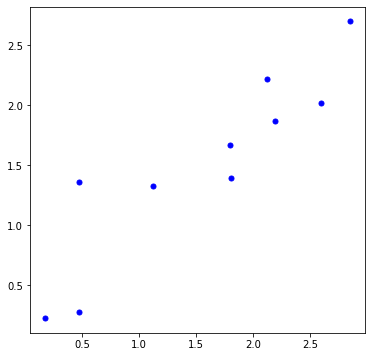

In [3]:
plt.figure(figsize=(6,6))
plt.plot(X, y, 'b.', markersize=10)

In [4]:
# Create some data to use for plotting
X_new = np.linspace(0,3,100).reshape(100,1) # Create an array of 100 equal-spaced numbers from 0->3

[0.33181066] [[0.75155622]]


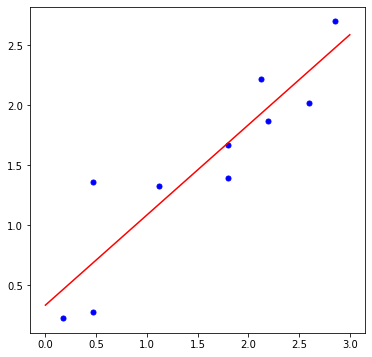

In [5]:
lin_reg = LinearRegression() # MLE
lin_reg.fit(X,y)
plt.figure(figsize=(6,6))
plt.plot(X,y,'b.', ms=10)
plt.plot(X_new, lin_reg.predict(X_new), 'r-')
print(lin_reg.intercept_, lin_reg.coef_)  # intercept_: w0 (sometimes we call it b) .coef_ : w1, w2, w3,....
# Here we only have a simple linear regression model: predict = w0 + w1*x

## Polynomial Regression

$\texttt{prediction} = w_0 + w_1x + w_2x^2 + w_3x^3 + \ldots + w_Dx^D$

[0.33181066] [[0.75155622]]
[-0.0916451] [[ 2.35120734 -1.23811156  0.26177074]]


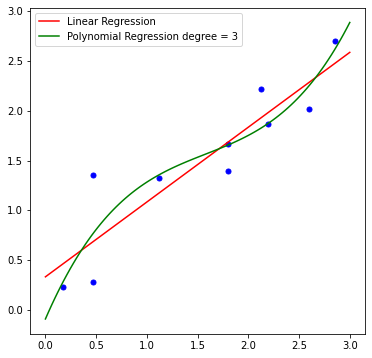

In [6]:
deg = 3
poly = PolynomialFeatures(degree=deg, include_bias=False)
X_poly = poly.fit_transform(X) # x --> x, x^2, x^3
X_new_poly = poly.fit_transform(X_new) # x --> x, x^2, x^3

poly_reg = LinearRegression()  # In essence, Polynomial Regression is still Linear Regression, but we use polynomial features x, x^2, x^3, ....
poly_reg.fit(X_poly,y) 

plt.figure(figsize=(6,6))
plt.plot(X,y,'b.', ms=10)
plt.plot(X_new, lin_reg.predict(X_new), 'r-', label='Linear Regression')
print(lin_reg.intercept_, lin_reg.coef_) 

plt.plot(X_new, poly_reg.predict(X_new_poly), 'g', label='Polynomial Regression degree = {}'.format(deg))
print(poly_reg.intercept_, poly_reg.coef_) 
plt.legend()

[0.33181066] [[0.75155622]]
[-0.0916451] [[ 2.35120734 -1.23811156  0.26177074]]
[38.06987101] [[ -399.60873894  1364.6957949  -2093.21939539  1665.82047803
   -716.24860926   158.03695712   -14.0390417 ]]


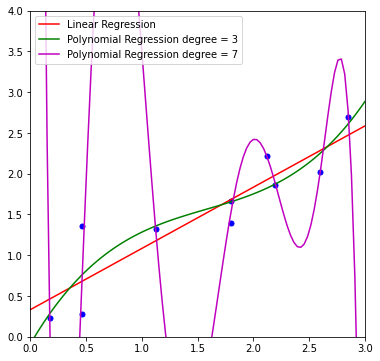

In [7]:
deg = 3
poly = PolynomialFeatures(degree=deg, include_bias=False)
X_poly = poly.fit_transform(X) # x --> x, x^2, x^3
X_new_poly = poly.fit_transform(X_new) # x --> x, x^2, x^3

poly_reg = LinearRegression()  # In essence, Polynomial Regression is still Linear Regression, but we use polynomial features x, x^2, x^3, ....
poly_reg.fit(X_poly,y) 

plt.figure(figsize=(6,6))
plt.plot(X,y,'b.', ms=10)
plt.plot(X_new, lin_reg.predict(X_new), 'r-', label='Linear Regression')
print(lin_reg.intercept_, lin_reg.coef_) 

plt.plot(X_new, poly_reg.predict(X_new_poly), 'g', label='Polynomial Regression degree = {}'.format(deg))
print(poly_reg.intercept_, poly_reg.coef_) 

deg = 7
poly = PolynomialFeatures(degree=deg, include_bias=False)
X_poly = poly.fit_transform(X) # x --> x, x^2, x^3, ..., x^7
X_new_poly = poly.fit_transform(X_new) # x --> x, x^2, x^3, ... x^7

poly_reg = LinearRegression()
poly_reg.fit(X_poly, y)
plt.plot(X_new, poly_reg.predict(X_new_poly), 'm', label='Polynomial Regression degree = {}'.format(deg))
print(poly_reg.intercept_, poly_reg.coef_) 

plt.axis([0, 3, 0, 4])
plt.legend()

The 7-th degree polynomial regression model above (magenta color) is overfit to our training dataset.
If we use an overfit model on our future data, it will have a lot of errors.

The magnitude of parameters of an overfit model would be very big (very far from 0.0).

## Ridge Regression

Ridge Regression: Weight Decay/Maximum A Posteriori Estimation (MAP) for Linear Regression

$\texttt{prediction} = w_0 + w_1x + w_2x^2 + \ldots + w_Dx^D$ (However $w_1, w_2,\ldots, w_D$ will have small values close to 0.0).

$w_{map} = \arg\min_{w} NLL(w) + \lambda\Vert w\Vert^2_2$


$\lambda\Vert w\Vert^2_2$: Regularziation term, and $\lambda$ is the regularization strength.

[0.33181066] [[0.75155622]]
[38.06439653] [[ -399.55116119  1364.49997836 -2092.91833368  1665.57976299
   -716.14450123   158.01383696   -14.03697387]]
[0.07987998] [[-0.09370917  6.1494496  -4.77478317 -3.78021901  5.7514049  -2.28394666
   0.29814783]]
[0.96643294] [[ 0.00141423  0.00266913  0.00442294  0.00683627  0.00931761  0.00896911
  -0.00359498]]
[1.50446301] [[6.07278017e-10 1.77351966e-09 4.72471362e-09 1.25448975e-08
  3.35844395e-08 9.07463757e-08 2.47260904e-07]]


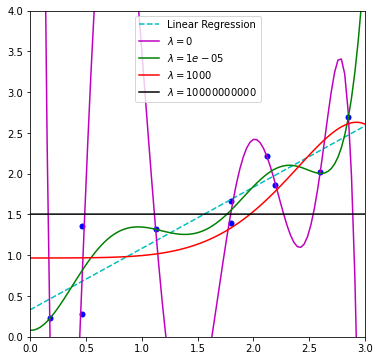

In [8]:
plt.figure(figsize=(6,6))
plt.plot(X,y,'b.', ms=10)
plt.axis([0, 3, 0, 4])

deg = 7
poly = PolynomialFeatures(degree=deg, include_bias=False)
X_poly = poly.fit_transform(X) # x ---> x, x^2, x^3, ..., x^7
X_new_poly = poly.fit_transform(X_new)

plt.plot(X_new, lin_reg.predict(X_new), 'c--', label='Linear Regression')
print(lin_reg.intercept_, lin_reg.coef_) 

lambd = 0
ridge_reg = Ridge(alpha=lambd)
ridge_reg.fit(X_poly, y)
plt.plot(X_new, ridge_reg.predict(X_new_poly), 'm-', label=r'$\lambda={}$'.format(lambd))
print(ridge_reg.intercept_, ridge_reg.coef_)

lambd = 10**-5  # 10^{-5}
ridge_reg = Ridge(alpha=lambd)
ridge_reg.fit(X_poly, y)
plt.plot(X_new, ridge_reg.predict(X_new_poly), 'g-', label=r'$\lambda={}$'.format(lambd))
print(ridge_reg.intercept_, ridge_reg.coef_)

lambd = 1000
ridge_reg = Ridge(alpha=lambd)
ridge_reg.fit(X_poly, y)
plt.plot(X_new, ridge_reg.predict(X_new_poly), 'r-', label=r'$\lambda={}$'.format(lambd))
print(ridge_reg.intercept_, ridge_reg.coef_)

lambd = 10000000000  # Choose it by our experience, trial and error
ridge_reg = Ridge(alpha=lambd)
ridge_reg.fit(X_poly, y)
plt.plot(X_new, ridge_reg.predict(X_new_poly), 'k-', label=r'$\lambda={}$'.format(lambd))
print(ridge_reg.intercept_, ridge_reg.coef_)

plt.legend()